# Learning and Intelligent Decision Making

## Laboratory: Reinforcement learning


### 1. The key world domain

Consider once again the gridworld domain from the previous lab and which you modeled using a Markov decision problem.

<img src="https://ead.puc-rio.br/pluginfile.php/2512172/mod_resource/content/1/maze.png" width="200px" />

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability.

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$.

* When the movement fails, the agent remains in the same cell.

* To get a colored key, the agent simply needs to stand in the corresponding cell.

* The goal of the agent is to reach the cell marked with **"G"**.

Throughout the lab, use $\gamma=0.99$. As seen in the previous lab, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

**Grupo**:

*   Micael Riboura - <https://github.com/MicaelRiboura> - Matrícula 2421764
*   Lucas Tavares - <https://github.com/LucasTavrs2> - Matrícula 2521346
*   Yang Miranda - <https://github.com/yangricardo> - Matrícula  2521249
*   Olavo Lucas - https://github.com/OLMS99 - Matricula: 2521361

In [38]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

# States
S = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']
num_states = len(S)
# Actions
A = ['U', 'D', 'L', 'R']
num_actions = len(A)

# Transition probabilities
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Reward function

Rw = np.array([[0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0, 1.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0]])

# Discount rate

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [39]:

# 📌 Activity 1 — Value Iteration for Optimal Q*

import numpy as np

# Definindo parâmetros do GridWorld
n_rows, n_cols = 4, 4
n_states = n_rows * n_cols
actions = ['U', 'D', 'L', 'R']
gamma = 0.99
goal_state = (0, 3)
pit_state = (1, 3)

def to_index(row, col): return row * n_cols + col
def to_state(idx): return divmod(idx, n_cols)

# Definindo função de transição
def step(state, action):
    r, c = to_state(state)
    if (r, c) == goal_state:
        return state, 0.0
    if (r, c) == pit_state:
        return state, -1.0

    if action == 'U': r = max(0, r-1)
    elif action == 'D': r = min(n_rows-1, r+1)
    elif action == 'L': c = max(0, c-1)
    elif action == 'R': c = min(n_cols-1, c+1)

    next_state = to_index(r, c)
    reward = 1.0 if (r, c) == goal_state else -0.04
    return next_state, reward

# Inicializa Q
Q = np.zeros((n_states, len(actions)))

# Value iteration
eps = 1e-8
while True:
    delta = 0
    for s in range(n_states):
        for a_idx, a in enumerate(actions):
            next_s, r = step(s, a)
            best_next = np.max(Q[next_s])
            new_q = r + gamma * best_next
            delta = max(delta, abs(new_q - Q[s,a_idx]))
            Q[s,a_idx] = new_q
    if delta < eps:
        break

Q_star = Q.copy()
print("✅ Value iteration finished. Optimal Q* computed.")
print(Q_star)


✅ Value iteration finished. Optimal Q* computed.
[[   0.85    0.8     0.85    0.9 ]
 [   0.9     0.85    0.85    0.95]
 [   0.95    0.9     0.9     1.  ]
 [   0.      0.      0.      0.  ]
 [   0.85    0.75    0.8     0.85]
 [   0.9     0.8     0.8     0.9 ]
 [   0.95    0.85    0.85  -99.04]
 [-100.   -100.   -100.   -100.  ]
 [   0.8     0.71    0.75    0.8 ]
 [   0.85    0.75    0.75    0.85]
 [   0.9     0.8     0.8     0.8 ]
 [ -99.04    0.75    0.85    0.8 ]
 [   0.75    0.71    0.71    0.75]
 [   0.8     0.75    0.71    0.8 ]
 [   0.85    0.8     0.75    0.75]
 [   0.8     0.75    0.8     0.75]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $s$, selects an action using the $\epsilon$-greedy policy. Specifically, your function should receive as input a Q-function $Q$, a state $s$, and a probability $\epsilon$ with a default value `eps=0.1`. Your function should return:

* a random action with a probability $\\epsilon$,
* an action corresponding to the maximum value of `Q` with a probability $1-\epsilon$. If more than one action has the same maximum `Q` value, the function should select one of these actions **uniformly at random**.

---

In [51]:
# 📌 Activity 2 — Epsilon-greedy Policy

import random

def epsilon_greedy(Q, state, eps=0.1):
    if random.random() < eps:
        return random.choice(range(len(actions)))
    else:
        max_q = np.max(Q[state])
        best_actions = [i for i, q in enumerate(Q[state]) if q == max_q]
        return random.choice(best_actions)

# Exemplo de uso
a = epsilon_greedy(Q_star, 0, eps=0.1)
print(f"Ação escolhida para o estado 0: {actions[a]}")


Ação escolhida para o estado 0: R


### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the reward function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* With the state and action, you will then compute the reward and generate the next state;
* With this transition information (state, action, reward, next state), you can now perform an update.
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the agent reaches the goal cell, make one further step, the corresponding update, and then reset the position of the agent to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

In [41]:
# 📌 Activity 3 — Model-based RL

num_iters = 5000
Q_model = np.zeros((n_states, len(actions)))
P = np.array([np.eye(n_states) for _ in actions])
R = np.zeros((n_states, len(actions)))
N = np.zeros((n_states, len(actions)))

state = np.random.randint(0, n_states)
norms_model = []

for t in range(num_iters):
    a_idx = epsilon_greedy(Q_model, state, eps=0.1)
    next_s, r = step(state, actions[a_idx])

    N[state,a_idx] += 1
    alpha_t = 1.0 / N[state,a_idx]

    R[state,a_idx] += alpha_t * (r - R[state,a_idx])
    P[a_idx,state] = 0
    P[a_idx,state,next_s] = 1

    # Q update
    Q_model[state,a_idx] = R[state,a_idx] + gamma * np.max(Q_model[next_s])

    # Reset ao atingir objetivo
    if to_state(next_s) == goal_state:
        state = np.random.randint(0, n_states)
    else:
        state = next_s

    norms_model.append(np.linalg.norm(Q_star - Q_model))

print("✅ Model-based RL finished.")

✅ Model-based RL finished.


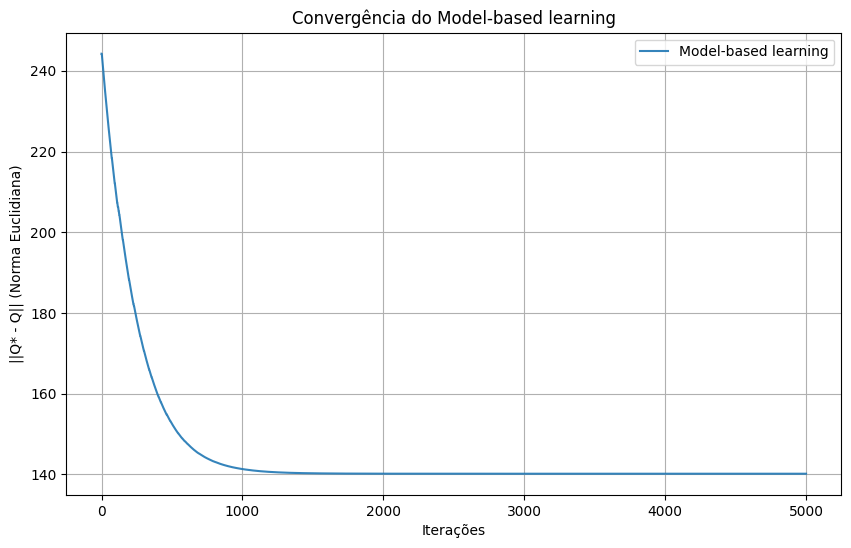

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(norms_model, label='Model-based learning', alpha=0.9)
plt.xlabel('Iterações')
plt.ylabel('||Q* - Q|| (Norma Euclidiana)')
plt.title('Convergência do Model-based learning')
plt.legend()
plt.grid(True)
plt.show()

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

In [42]:
norms_qlearning = []

Q_qlearning = np.zeros((n_states, len(actions)))
alpha = 0.3

for t in range(num_iters):
    s = np.random.randint(0, n_states)
    a_idx = epsilon_greedy(Q_qlearning, s, eps=0.1)
    next_s, r = step(s, actions[a_idx])
    Q_qlearning[s,a_idx] += alpha * (r + gamma * np.max(Q_qlearning[next_s]) - Q_qlearning[s,a_idx])

    
    norms_qlearning.append(np.linalg.norm(Q_star - Q_qlearning))
print("✅ Q-learning finished.")

✅ Q-learning finished.


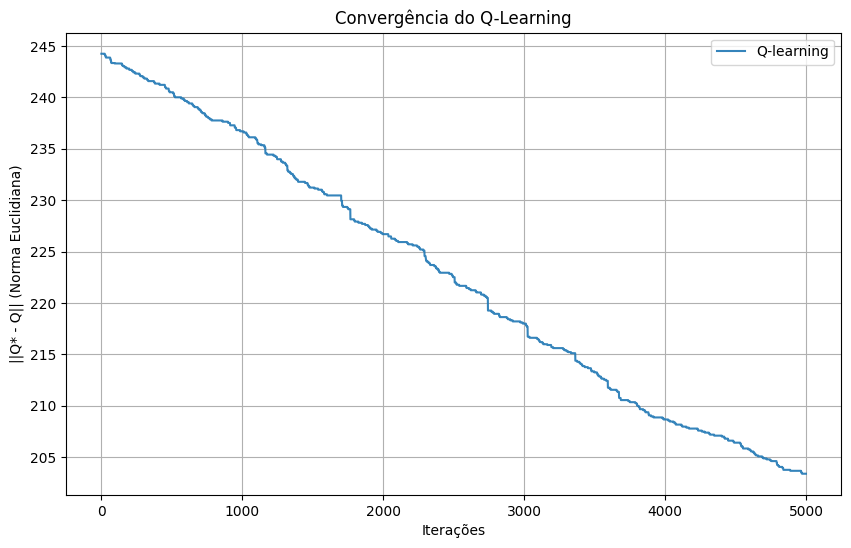

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(norms_qlearning, label='Q-learning', alpha=0.9)
plt.xlabel('Iterações')
plt.ylabel('||Q* - Q|| (Norma Euclidiana)')
plt.title('Convergência do Q-Learning')
plt.legend()
plt.grid(True)
plt.show()

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

In [43]:
Q_sarsa = np.zeros((n_states, len(actions)))
alpha = 0.3
norms_sarsa = []

for t in range(num_iters):
    s = np.random.randint(0, n_states)
    a_idx = epsilon_greedy(Q_sarsa, s, eps=0.1)
    next_s, r = step(s, actions[a_idx])
    next_a = epsilon_greedy(Q_sarsa, next_s, eps=0.1)
    Q_sarsa[s,a_idx] += alpha * (r + gamma * Q_sarsa[next_s,next_a] - Q_sarsa[s,a_idx])
    
    norms_sarsa.append(np.linalg.norm(Q_star - Q_sarsa))

print("✅ SARSA finished.")

✅ SARSA finished.


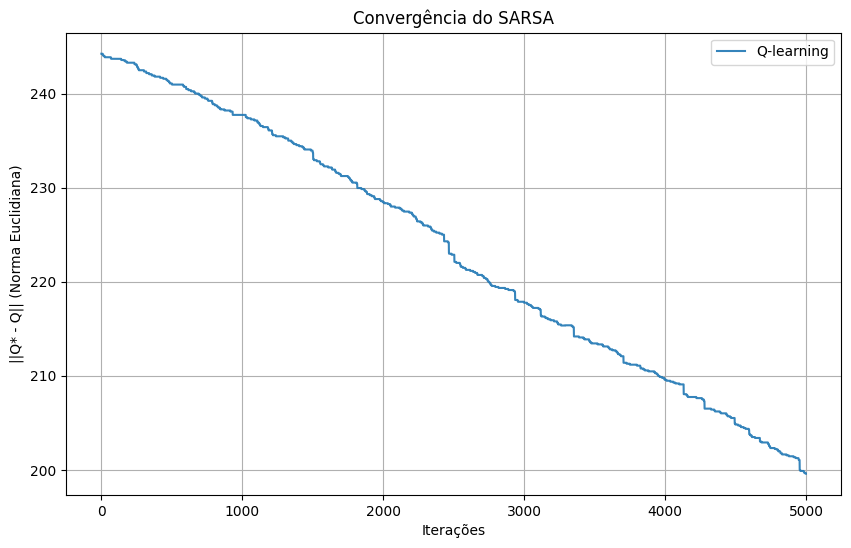

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(norms_sarsa, label='Q-learning', alpha=0.9)
plt.xlabel('Iterações')
plt.ylabel('||Q* - Q|| (Norma Euclidiana)')
plt.title('Convergência do SARSA')
plt.legend()
plt.grid(True)
plt.show()

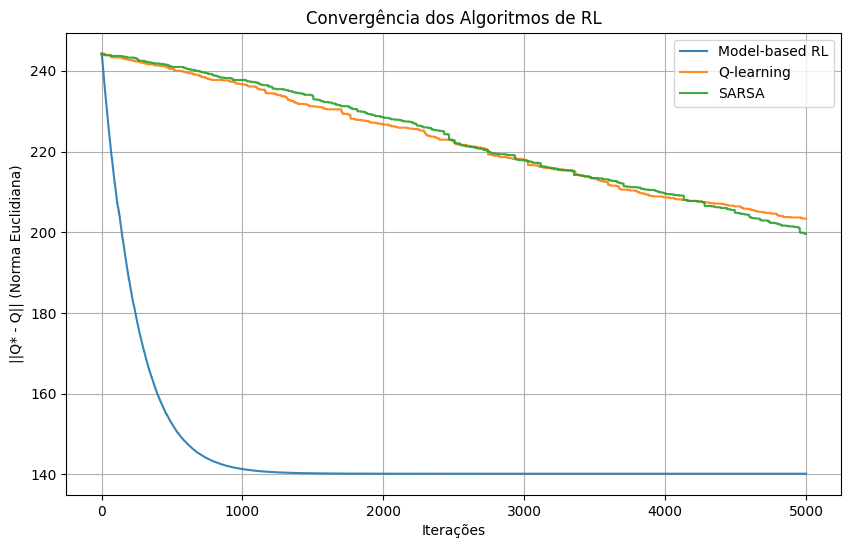

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(norms_model, label='Model-based RL', alpha=0.9)
plt.plot(norms_qlearning, label='Q-learning', alpha=0.9)
plt.plot(norms_sarsa, label='SARSA', alpha=0.9)
plt.xlabel('Iterações')
plt.ylabel('||Q* - Q|| (Norma Euclidiana)')
plt.title('Convergência dos Algoritmos de RL')
plt.legend()
plt.grid(True)
plt.show()

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---